<a href="https://colab.research.google.com/github/crisalonso12/Gestion_cine/blob/main/Actividad_Potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

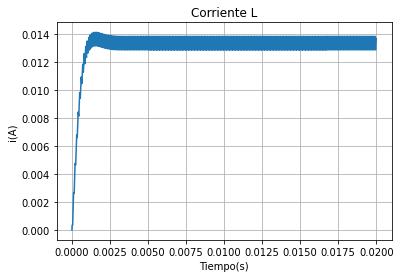

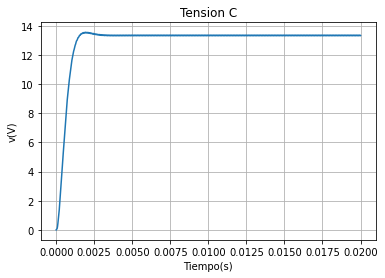

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
from scipy.integrate import odeint

#Definicion de constantes 
e = np.e
stoptime = 0.02
numpoints = 120000
maxtime = 0.00000625
t = np.linspace(0,stoptime, num = numpoints)
y1 = np.zeros(numpoints)
y2 = np.zeros(numpoints)
abserr = 1.0*e**(-8)
relerr = 1.0*e**(-8)

#Definicion de parametros 
L = 0.600
C = 0.000000230
Vi = 24
RL = 1000
ts = 10000

d = np.linspace(0.2,0.8,num = numpoints)

p = [Vi, L, C, RL]
x0 = [0,0]

#Definicion de funciones

#Generacion diente sierra
def sawtooth (fs, t) : #funcion diente de sierra
  return 0.5*(1 + 2*(t*fs - math.floor(0.5 + t*fs)))

# Generador PWM 
def pwm(d, fs, t) : #funcion PWM 
  return 1 if d > sawtooth(fs, t) else 0

# Funcion del convertidor 
def convertidor (x, t, p): # definicion de la funcion del modelo matematico del convertidor
  x1, x2 = x
  Vi, L, C, RL = p
  d1 = 0.58
  u = pwm(d1, ts, t)
  f = [((u*Vi-x2)/L), ((x1-(x2/RL))/C)]
  return f

#Codigo
for j in range(numpoints) :
  y1[j] = sawtooth(ts,t[j])


for j in range(numpoints) :
  y2[j] = pwm(d[j], ts,t[j])

# solucionador de la ecuacion diferencial 
sol = odeint(convertidor, x0, t, args = (p,), atol = abserr, rtol = relerr, hmax = maxtime)

#Impresion de resultados 

plt.figure(1) 
plt.plot( t, sol [ : , 0 ] ) 
plt.xlabel( 'Tiempo(s)') 
plt.title( 'Corriente L') 
plt.ylabel( 'i(A)') 
plt.grid (True) 

plt.figure(2) 
plt.plot( t, sol [ : , 1 ] ) 
plt.xlabel( 'Tiempo(s)') 
plt.title( 'Tension C') 
plt.ylabel( 'v(V)') 
plt.grid(True) 

plt.show()